In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Ingestion des données

In [2]:
portfolio = pd.read_excel('BI WIP.xlsx', index_col = 0, sheet_name='portfolio')
benchmark = pd.read_excel('BI WIP.xlsx', index_col = 0, sheet_name='benchmark')
portfolio.iloc[0,1] = np.nan
benchmark.iloc[0,1] = np.nan

Définitions de quelques listes de sélection utiles :

In [3]:
X_portfolio = portfolio.iloc[0,2:22].index.values
P_portfolio = portfolio.iloc[0,22:42].index.values
R_portfolio = portfolio.iloc[0,42:62].index.values

In [112]:
X_portfolio #a titre d'exemple

array(['X_Life Technologies Corp', 'X_MOSAIC CO/THE', 'X_CAMECO CORP',
       "X_People's United Financial Inc", 'X_BRISTOL-MYERS SQUIBB CO',
       'X_CBRE Group Inc', 'X_CAMPBELL SOUP CO', 'X_FEDEX CORP',
       'X_SAGE GROUP PLC/THE', 'X_SEGRO PLC', 'X_A2A SpA',
       'X_VOLKSWAGEN AG-PREF', 'X_SANDVIK AB',
       'X_Liberty Global A-Equity', 'X_SAMSUNG ELECTRO-MECHANICS CO',
       'X_TAISHIN FINANCIAL HOLDING', 'X_Kewpie Corp',
       'X_ANHUI CONCH CEMENT CO LTD-H', 'X_MODEC INC', 'X_Baidu Inc'],
      dtype=object)

### Calcul des contributions sur la dernière année

Définion du jeu de données qui nous intéresse (ytd = "year to date")

In [5]:
portfolio.tail(1).index.values

array(['2019-03-12'], dtype=object)

In [114]:
date_ytd = portfolio.loc['2018-03-13':,:].index.values
ytd = portfolio.loc[date_ytd]

Visualisation des données afin de vérifier la cohérence de nos résultats par la suite.

*Commentaire sur le graphique:* CBRE a un spike en un jour en 2018 qui ne semble pas avéré après une recherche en ligne. Mais si nous avons fait de notre mieux il semble que des données erronnées soient encore présentes dans a base.


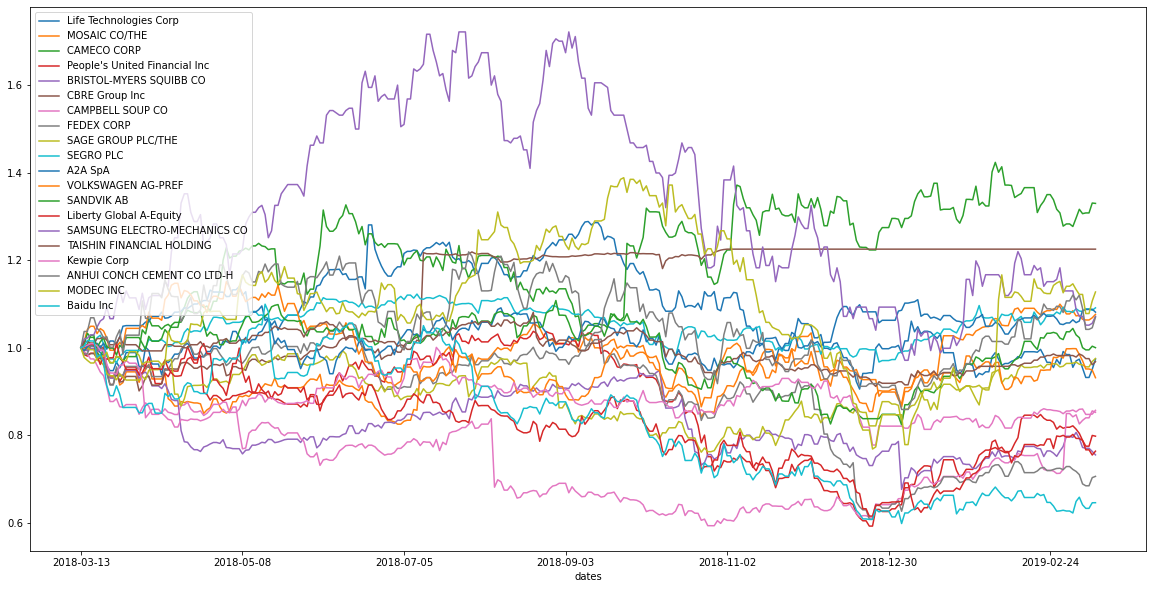

In [115]:
ytd[P_portfolio].apply(lambda x : x/float(x.iloc[0])).plot(figsize=(20,10))

In [8]:
ytd.iloc[0,42:62] = np.nan# Au temps 0, nous considérons qu'il n'y a pas de rentabilité connue.
ytd.iloc[0,1] = np.nan

C:\Users\1s2ad\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**Calcul des rentabilités sur l'année :**

In [117]:
pyield = ytd[R_portfolio][1:].apply(lambda x : 1+x).prod() - 1; 
#print(pyield.sort_values(ascending = False))
#top5_yield = pyield.head(5); print(top5_yield)
#bottom5_yield = pyield.tail(5); print(bottom5_yield)

In [10]:
contrib = ytd[X_portfolio].iloc[0,:].to_frame(name='poids initiaux')

In [11]:
contrib['poids finaux'] = ytd[X_portfolio].iloc[-1,:]

In [12]:
contrib.index = contrib.index.map(lambda x : x[2:])

In [13]:
contrib['performance'] = pyield.values

In [14]:
contrib['contribution'] = contrib['poids initiaux']*contrib.performance

In [15]:
contrib

,poids initiaux,poids finaux,performance,contribution
Life Technologies Corp,0.043747,0.044307,-0.026030,-0.001139
MOSAIC CO/THE,0.046548,0.052100,0.076350,0.003554
CAMECO CORP,0.021097,0.029172,0.329707,0.006956
People's United Financial Inc,0.035616,0.029565,-0.201734,-0.007185
BRISTOL-MYERS SQUIBB CO,0.048939,0.038450,-0.244451,-0.011963
CBRE Group Inc,0.053868,0.068634,0.225255,0.012134
CAMPBELL SOUP CO,0.048568,0.043069,-0.147232,-0.007151
FEDEX CORP,0.065988,0.048480,-0.293496,-0.019367
SAGE GROUP PLC/THE,0.004536,0.004602,-0.024348,-0.000110
SEGRO PLC,0.041223,0.046779,0.091270,0.003762


**Résultat de notre calcul de contribution affiché de manière ordonnée**

In [16]:
print(contrib.sort_values('contribution', ascending=False))

                               poids initiaux  poids finaux  performance  \
CBRE Group Inc                       0.053868      0.068634     0.225255   
A2A SpA                              0.122939      0.138253     0.081446   
CAMECO CORP                          0.021097      0.029172     0.329707   
SAMSUNG ELECTRO-MECHANICS CO         0.095590      0.106539     0.071806   
MODEC INC                            0.035622      0.041765     0.127469   
SEGRO PLC                            0.041223      0.046779     0.091270   
MOSAIC CO/THE                        0.046548      0.052100     0.076350   
ANHUI CONCH CEMENT CO LTD-H          0.044000      0.048948     0.069795   
SANDVIK AB                           0.052813      0.054938     0.000336   
SAGE GROUP PLC/THE                   0.004536      0.004602    -0.024348   
TAISHIN FINANCIAL HOLDING            0.030872      0.031085    -0.031690   
Life Technologies Corp               0.043747      0.044307    -0.026030   
VOLKSWAGEN A

### Exposition, contribution par secteur et par pays

Calcul des contributions sur toute la période (au lieu de 1 an seulement)

In [153]:
_yield = portfolio[R_portfolio][1:].apply(lambda x : 1+x).prod() - 1; 
#print(pyield.sort_values(ascending = False))
#top5_yield = pyield.head(5); print(top5_yield)
#bottom5_yield = pyield.tail(5); print(bottom5_yield)

total_contrib = portfolio[X_portfolio].iloc[0,:].to_frame(name='poids initiaux')
total_contrib['poids finaux'] = portfolio[X_portfolio].iloc[-1,:]
total_contrib.index = total_contrib.index.map(lambda x : x[2:])
total_contrib['performance'] = _yield.values
total_contrib['contribution'] = total_contrib['poids initiaux']*total_contrib.performance

In [154]:
total_contrib

,poids initiaux,poids finaux,performance,contribution
Life Technologies Corp,0.040909,0.044307,0.358775,0.014677
MOSAIC CO/THE,0.050699,0.052100,0.292828,0.014846
CAMECO CORP,0.050699,0.029172,-0.280978,-0.014245
People's United Financial Inc,0.050699,0.029565,-0.267774,-0.013576
BRISTOL-MYERS SQUIBB CO,0.050000,0.038450,-0.022222,-0.001111
CBRE Group Inc,0.058374,0.068634,0.499888,0.029181
CAMPBELL SOUP CO,0.050699,0.043069,0.079262,0.004018
FEDEX CORP,0.047922,0.048480,0.250136,0.011987
SAGE GROUP PLC/THE,0.003438,0.004602,0.706965,0.002430
SEGRO PLC,0.032534,0.046779,0.815083,0.026518


On utilise le tableau de contribution ainsi calculé pour donner l'exposition

In [155]:
mapping = pd.read_csv('actifs_dico.csv', index_col=0)

In [156]:
df = total_contrib

In [157]:
df = df.join(mapping,how='left')

*Par secteur **et** par pays **avec** sous-totaux*

In [209]:
export1 = pd.pivot_table(df,values='poids finaux',index='Sector', columns='Country',\
               aggfunc=np.sum, fill_value=0, margins=True)
export1

Country,CANADA,CHINA,GERMANY,ITALY,JAPAN,SOUTH KOREA,SWEDEN,TAIWAN,UNITED KINGDOM,UNITED STATES,All
Sector,,,,,,,,,,,
Communication Services,0.000000,0.044011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017934,0.000000,0.061945
Consumer Discretionary,0.000000,0.000000,0.055169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055169
Consumer Staples,0.000000,0.000000,0.000000,0.000000,0.056201,0.000000,0.000000,0.000000,0.000000,0.043069,0.099270
Energy,0.029172,0.000000,0.000000,0.000000,0.041765,0.000000,0.000000,0.000000,0.000000,0.000000,0.070937
Financials,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031085,0.000000,0.029565,0.060650
Health Care,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082758,0.082758
Industrials,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054938,0.000000,0.000000,0.048480,0.103417
Information Technology,0.000000,0.000000,0.000000,0.000000,0.000000,0.106539,0.000000,0.000000,0.004602,0.000000,0.111140
Materials,0.000000,0.048948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052100,0.101048


*Par secteur **et** par pays **sans** sous-totaux*

In [215]:
export2 = df.groupby(by=['Sector','Country']).sum()
export2

poids initiaux  poids finaux  \
Sector                 Country                                        
Communication Services CHINA                 0.051686      0.044011   
                       UNITED KINGDOM        0.039226      0.017934   
Consumer Discretionary GERMANY               0.090908      0.055169   
Consumer Staples       JAPAN                 0.040210      0.056201   
                       UNITED STATES         0.050699      0.043069   
Energy                 CANADA                0.050699      0.029172   
                       JAPAN                 0.040210      0.041765   
Financials             TAIWAN                0.040210      0.031085   
                       UNITED STATES         0.050699      0.029565   
Health Care            UNITED STATES         0.090909      0.082758   
Industrials            SWEDEN                0.042985      0.054938   
                       UNITED STATES         0.047922      0.048480   
Information Technology SOUTH KOREA           0.087474      0.106539   
                       UNITED KINGDOM        0.003438      0.004602   
Materials              CHINA                 0.040210      0.048948   
                       UNITED STATES         0.050699      0.052100   
Real Estate            UNITED KINGDOM        0.032534      0.046779   
                       UNITED STATES         0.058374      0.068634   
Utilities              ITALY                 0.090908      0.138253   

                                       performance  contribution  
Sector                 Country                                    
Communication Services CHINA              0.100637      0.005202  
                       UNITED KINGDOM    -0.408555     -0.016026  
Consumer Discretionary GERMANY           -0.217149     -0.019741  
Consumer Staples       JAPAN              0.739234      0.029725  
                       UNITED STATES      0.079262      0.004018  
Energy                 CANADA            -0.280978     -0.014245  
                       JAPAN              0.302161      0.012150  
Financials             TAIWAN            -0.035112     -0.001412  
                       UNITED STATES     -0.267774     -0.013576  
Health Care            UNITED STATES      0.336553      0.013566  
Industrials            SWEDEN             0.617254      0.026533  
                       UNITED STATES      0.250136      0.011987  
Information Technology SOUTH KOREA        0.556786      0.048704  
                       UNITED KINGDOM     0.706965      0.002430  
Materials              CHINA              0.555899      0.022353  
                       UNITED STATES      0.292828      0.014846  
Real Estate            UNITED KINGDOM     0.815083      0.026518  
                       UNITED STATES      0.499888      0.029181  
Utilities              ITALY              0.885102      0.080463

*Par secteur **uniquement**.*

In [211]:
export3 = df.groupby(by=['Sector']).sum()
export3

,poids initiaux,poids finaux,performance,contribution
Sector,,,,
Communication Services,0.090912,0.061945,-0.307917,-0.010824
Consumer Discretionary,0.090908,0.055169,-0.217149,-0.019741
Consumer Staples,0.090909,0.099270,0.818495,0.033743
Energy,0.090909,0.070937,0.021184,-0.002095
Financials,0.090909,0.060650,-0.302886,-0.014988
Health Care,0.090909,0.082758,0.336553,0.013566
Industrials,0.090908,0.103417,0.867391,0.038520
Information Technology,0.090912,0.111140,1.263750,0.051135
Materials,0.090909,0.101048,0.848727,0.037199


*Par pays **uniquement**.*

In [212]:
export4 = df.groupby(by=['Country']).sum()
export4

,poids initiaux,poids finaux,performance,contribution
Country,,,,
CANADA,0.050699,0.029172,-0.280978,-0.014245
CHINA,0.091896,0.092959,0.656536,0.027554
GERMANY,0.090908,0.055169,-0.217149,-0.019741
ITALY,0.090908,0.138253,0.885102,0.080463
JAPAN,0.080420,0.097966,1.041395,0.041874
SOUTH KOREA,0.087474,0.106539,0.556786,0.048704
SWEDEN,0.042985,0.054938,0.617254,0.026533
TAIWAN,0.040210,0.031085,-0.035112,-0.001412
UNITED KINGDOM,0.075198,0.069315,1.113493,0.012922


### Répartition de la performance et de la volatilité par zones géographique et par secteurs d’activité, puis par pays et par industrie

In [162]:
#portfolio[R_portfolio]

In [163]:
portfolio_mapping = mapping.loc[P_portfolio,:] #pour référence
portfolio_mapping

,Geographical_zone,Country,Sector,Industry
Name,,,,
Life Technologies Corp,NORTH AMERICA,UNITED STATES,Health Care,Biotechnology
MOSAIC CO/THE,NORTH AMERICA,UNITED STATES,Materials,Chemicals
CAMECO CORP,NORTH AMERICA,CANADA,Energy,"Oil, Gas & Consumable Fuels"
People's United Financial Inc,NORTH AMERICA,UNITED STATES,Financials,Banks
BRISTOL-MYERS SQUIBB CO,NORTH AMERICA,UNITED STATES,Health Care,Pharmaceuticals
CBRE Group Inc,NORTH AMERICA,UNITED STATES,Real Estate,Real Estate Management & Devel
CAMPBELL SOUP CO,NORTH AMERICA,UNITED STATES,Consumer Staples,Food Products
FEDEX CORP,NORTH AMERICA,UNITED STATES,Industrials,Air Freight & Logistics
SAGE GROUP PLC/THE,EUROPE,UNITED KINGDOM,Information Technology,Software


#### Code final (modifié pour prendre en compte les pondérations)

In [184]:
T = 4.830136986
nb_days_open = 289.2257516
#pour rappel, on a enlevé les 45 premières dates parce qu'elles comportaient trop de soucis, donc T != 5
#généré à partir du excel (plus simple pour les calculs de date)

*Zones géographiques*

In [164]:
zone = portfolio_mapping.Geographical_zone.drop_duplicates().values;print(zone)

['NORTH AMERICA' 'EUROPE' 'ASIA/PACIFIC']


In [187]:
data_zone = {'Zone':[],
            'Contribution annualisée':[],
            'Volatilité annualisée':[]}

for zones in zone:
    securities = portfolio_mapping[portfolio_mapping.Geographical_zone==zones].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    perf = (perf+1)**(1/T)-1 #annualisation du rendement
    var = np.sqrt(var*nb_days_open) #annualisation de la volatilité
    data_zone['Zone'].append(zones)
    data_zone['Contribution annualisée'].append(perf)
    data_zone['Volatilité annualisée'].append(var)
    

In [220]:
df_zone = pd.DataFrame(data_zone)
df_zone.set_index('Zone', inplace=True)
df_zone

,Contribution annualisée,Volatilité annualisée
Zone,,
NORTH AMERICA,0.009310,0.088976
EUROPE,0.019963,0.042415
ASIA/PACIFIC,0.023119,0.047052


In [196]:
print("Somme des contributions : ", df_zone['Contribution annualisée'].sum()) #sanity check, correspond bien à la contribution au global
print("vs performance globale du portefeuille : ", portfolio.portfolio_R.apply(lambda x: 1+x).cumprod().iloc[-1]**(1/T)-1)

Somme des contributions :  0.05239150989177488
vs performance globale du portefeuille :  0.04954672617601963


*Secteur d'activité*

In [197]:
sector = portfolio_mapping.Sector.drop_duplicates().values;print(sector)

['Health Care' 'Materials' 'Energy' 'Financials' 'Real Estate'
 'Consumer Staples' 'Industrials' 'Information Technology' 'Utilities'
 'Consumer Discretionary' 'Communication Services']


In [198]:
data_secteur = {'Sector':[],
            'Contribution annualisée':[],
            'Volatilité annualisée':[]}

for sectors in sector:
    securities = portfolio_mapping[portfolio_mapping.Sector==sectors].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    perf = (perf+1)**(1/T)-1 #annualisation du rendement
    var = np.sqrt(var*nb_days_open) #annualisation de la volatilité
    data_secteur['Sector'].append(sectors)
    data_secteur['Contribution annualisée'].append(perf)
    data_secteur['Volatilité annualisée'].append(var)
    

In [223]:
df_secteur = pd.DataFrame(data_secteur)
df_secteur.set_index('Sector', inplace=True)
df_secteur

,Contribution annualisée,Volatilité annualisée
Sector,,
Health Care,0.002794,0.040442
Materials,0.007590,0.018727
Energy,-0.000434,0.021552
Financials,-0.003122,0.027231
Real Estate,0.011285,0.011971
Consumer Staples,0.006894,0.020121
Industrials,0.007856,0.022148
Information Technology,0.010378,0.015753
Utilities,0.016151,0.011155


In [200]:
#df_secteur.Contribution.sum() #sanity check, correspond bien à la contribution au global

*Pays*

In [201]:
country = portfolio_mapping.Country.drop_duplicates().values;print(country)

['UNITED STATES' 'CANADA' 'UNITED KINGDOM' 'ITALY' 'GERMANY' 'SWEDEN'
 'SOUTH KOREA' 'TAIWAN' 'JAPAN' 'CHINA']


In [202]:
data_country = {'Pays':[],
            'Contribution annualisée':[],
            'Volatilité annualisée':[]}

for countries in country:
    securities = portfolio_mapping[portfolio_mapping.Country==countries].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    perf = (perf+1)**(1/T)-1 #annualisation du rendement
    var = np.sqrt(var*nb_days_open) #annualisation de la volatilité
    data_country['Pays'].append(countries)
    data_country['Contribution annualisée'].append(perf)
    data_country['Volatilité annualisée'].append(var)
    

In [221]:
df_country = pd.DataFrame(data_country)
df_country.set_index('Pays', inplace=True)
df_country

,Contribution annualisée,Volatilité annualisée
Pays,,
UNITED STATES,0.012141,0.081220
CANADA,-0.002966,0.017615
UNITED KINGDOM,0.002662,0.022702
ITALY,0.016151,0.011155
GERMANY,-0.004119,0.011820
SWEDEN,0.005436,0.012329
SOUTH KOREA,0.009894,0.001730
TAIWAN,-0.000292,0.016978
JAPAN,0.008529,0.019762


In [204]:
#df_country.Contribution.sum() #sanity check, correspond bien à la contribution au global

*Industrie*

In [205]:
industry = portfolio_mapping.Industry.drop_duplicates().values;print(industry)

['Biotechnology' 'Chemicals' 'Oil, Gas & Consumable Fuels' 'Banks'
 'Pharmaceuticals' 'Real Estate Management & Devel' 'Food Products'
 'Air Freight & Logistics' 'Software' 'Equity Real Estate Investment'
 'Multi-Utilities' 'Automobiles' 'Machinery' 'Media'
 'Electronic Equipment, Instrume' 'Construction Materials'
 'Energy Equipment & Services' 'Interactive Media & Services']


In [206]:
data_industry = {'Industrie':[],
            'Contribution annualisée':[],
            'Volatilité annualisée':[]}

for industries in industry:
    securities = portfolio_mapping[portfolio_mapping.Industry==industries].index.values
    perf = df.loc[securities,'contribution'].sum()
    var = covar_pondere[securities].loc[securities].sum().sum()
    perf = (perf+1)**(1/T)-1 #annualisation du rendement
    var = np.sqrt(var*nb_days_open) #annualisation de la volatilité
    data_industry['Industrie'].append(industries)
    data_industry['Contribution annualisée'].append(perf)
    data_industry['Volatilité annualisée'].append(var)
    

In [222]:
df_industry = pd.DataFrame(data_industry)
df_industry.set_index('Industrie', inplace=True)
df_industry

,Contribution annualisée,Volatilité annualisée
Industrie,,
Biotechnology,0.003021,0.037073
Chemicals,0.003056,0.010590
"Oil, Gas & Consumable Fuels",-0.002966,0.017615
Banks,-0.003122,0.027231
Pharmaceuticals,-0.000230,0.005458
Real Estate Management & Devel,0.005973,0.010158
Food Products,0.006894,0.020121
Air Freight & Logistics,0.002470,0.014967
Software,0.000503,0.014467


In [208]:
#df_industry.Contribution.sum() #sanity check, correspond bien à la contribution au global

### Export

In [218]:
with pd.ExcelWriter('facts sheet.xlsx') as writer:  
    contrib.to_excel(writer, sheet_name='c-Contribution')
    export1.to_excel(writer, sheet_name='d-Repartition avec ss totaux')
    export2.to_excel(writer, sheet_name='d-Repartition sans ss totaux')
    export3.to_excel(writer, sheet_name='d-Repartition secteur ')
    export4.to_excel(writer, sheet_name='d-Repartition pays ')
    df_zone.to_excel(writer, sheet_name='e-Perf&vol zone')
    df_secteur.to_excel(writer, sheet_name='e-Perf&vol secteur')
    df_country.to_excel(writer, sheet_name='e-Perf&vol pays')
    df_industry.to_excel(writer, sheet_name='e-Perf&vol industrie')

### Espace test

In [150]:
df

,poids initiaux,poids finaux,performance,contribution,Geographical_zone,Country,Sector,Industry
A2A SpA,0.090908,0.138253,0.885102,0.007404,EUROPE,ITALY,Utilities,Multi-Utilities
ANHUI CONCH CEMENT CO LTD-H,0.040210,0.048948,0.555899,0.002806,ASIA/PACIFIC,CHINA,Materials,Construction Materials
BRISTOL-MYERS SQUIBB CO,0.050000,0.038450,-0.022222,-0.012223,NORTH AMERICA,UNITED STATES,Health Care,Pharmaceuticals
Baidu Inc,0.051686,0.044011,0.100637,-0.018278,ASIA/PACIFIC,CHINA,Communication Services,Interactive Media & Services
CAMECO CORP,0.050699,0.029172,-0.280978,0.016716,NORTH AMERICA,CANADA,Energy,"Oil, Gas & Consumable Fuels"
CAMPBELL SOUP CO,0.050699,0.043069,0.079262,-0.007464,NORTH AMERICA,UNITED STATES,Consumer Staples,Food Products
CBRE Group Inc,0.058374,0.068634,0.499888,0.013149,NORTH AMERICA,UNITED STATES,Real Estate,Real Estate Management & Devel
FEDEX CORP,0.047922,0.048480,0.250136,-0.014065,NORTH AMERICA,UNITED STATES,Industrials,Air Freight & Logistics
Kewpie Corp,0.040210,0.056201,0.739234,-0.005739,ASIA/PACIFIC,JAPAN,Consumer Staples,Food Products
Liberty Global A-Equity,0.039226,0.017934,-0.408555,-0.009256,EUROPE,UNITED KINGDOM,Communication Services,Media


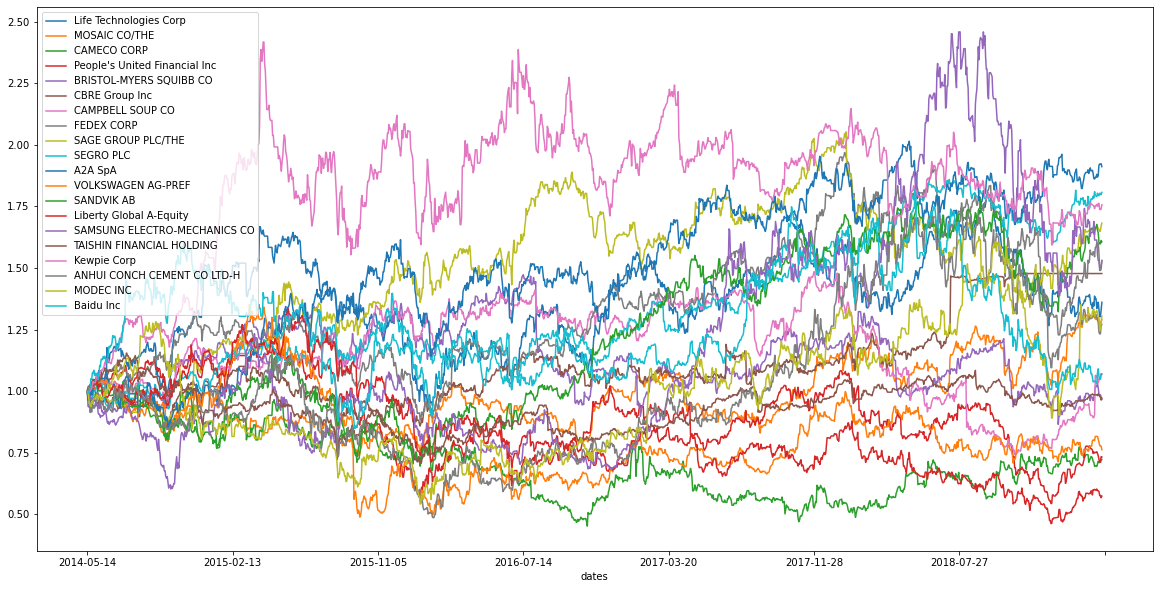

In [148]:
portfolio[P_portfolio].apply(lambda x : x/float(x.iloc[0])).plot(figsize=(20,10))

#### Test de faisabilité pour la zone EU

In [27]:
zone = portfolio_mapping.Geographical_zone.drop_duplicates().values;print(zone)
secteur = portfolio_mapping.Sector.drop_duplicates()
pays = portfolio_mapping.Country.drop_duplicates()
industrie = portfolio_mapping.Industry.drop_duplicates()

['NORTH AMERICA' 'EUROPE' 'ASIA/PACIFIC']


In [28]:
EU = zone[1]

In [29]:
EU_securities = portfolio_mapping[portfolio_mapping.Geographical_zone==EU].index.values

In [30]:
EU_perf = df.loc[EU_securities,'performance'].sum()

In [64]:
covar = pd.read_excel('portfolio.xlsx', sheet_name='Matrice Variance-Covariance', index_col=0)
covar_pondere = covar*df['poids initiaux'].values.transpose()*df['poids initiaux'].values

In [65]:
EU_var = covar_pondere[EU_securities].loc[EU_securities].sum().sum()

In [66]:
print(EU_perf)
print(EU_var)

-0.1554621580670742
6.22015434375683e-06


In [67]:
EU_var

6.22015434375683e-06

In [69]:
covar_pondere[EU_securities].loc[EU_securities]

,SAGE GROUP PLC/THE,SEGRO PLC,A2A SpA,VOLKSWAGEN AG-PREF,SANDVIK AB,Liberty Global A-Equity
SAGE GROUP PLC/THE,7.236849e-07,2.987737e-08,7.167694e-08,9.791746e-08,1.512164e-07,5.703101e-08
SEGRO PLC,2.330502e-07,6.662256e-08,9.646160e-08,8.253647e-08,1.172244e-07,6.153336e-08
A2A SpA,1.488531e-07,2.568183e-08,4.302581e-07,1.063159e-07,1.247806e-07,5.874535e-08
VOLKSWAGEN AG-PREF,3.066820e-07,3.314110e-08,1.603422e-07,4.830825e-07,3.014121e-07,1.129636e-07
SANDVIK AB,2.773757e-07,2.756642e-08,1.102143e-07,1.765232e-07,5.255499e-07,7.756830e-08
Liberty Global A-Equity,1.786882e-07,2.471659e-08,8.862982e-08,1.130044e-07,1.324951e-07,4.067311e-07


#### Autres (vérifications des calculs excel de la valeur du sous-jacent)

In [ ]:
df.contribution.sum()

In [ ]:
(contrib['poids finaux']*contrib.performance).sum()

In [ ]:
print((ytd.portfolio_R.apply(lambda x: 1+x).cumprod()).iloc[-1]-1)
(ytd.portfolio_R.apply(lambda x: 1+x).cumprod()).plot()

In [ ]:
test = ytd.portfolio_R.to_frame()

In [ ]:
test.rename(columns = {'portfolio_R': 'R'}, inplace=True)

In [ ]:
test.iloc[0,0] = np.nan
test

In [ ]:
test['V']= df.R.apply(lambda x: 1+x).cumprod()

In [ ]:
test.iloc[0,1] = 1

In [ ]:
a = ytd.iloc[0,:].loc[X_portfolio]#.div(ytd.iloc[0,:].loc[P_portfolio])

In [ ]:
b = ytd.iloc[0,:].loc[P_portfolio]

In [ ]:
a.index = b.index.values

In [ ]:
a

In [ ]:
b

In [ ]:
N = a/b
N

In [ ]:
(N*b).sum()

In [ ]:
(ytd.loc[:,P_portfolio]*N).sum(axis=1)

In [ ]:
test.rename(columns={'R': 'R_excel', 'V': 'V_deduite_excel'}, inplace=True)

In [ ]:
test['V_recalculee'] = (ytd.loc[:,P_portfolio]*N).sum(axis=1)

In [ ]:
test

In [ ]:
test.iloc[:,1:].plot(figsize=(10,5))